In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits                                      
import numpy as np
from numpy import *
import pyspeckit
from scipy.ndimage.filters import gaussian_filter1d

In [64]:
#rebinning data

data1 = loadtxt('le6g03010_x1dsum_April27.txt')
x1 = data1[:,0]
y1 = data1[:,1]
data2 = loadtxt('le6g04010_x1dsum_April27.txt') #2nd dataset for april 27
x2 = data2[:,0]
y2 = data2[:,1]
data3 = loadtxt('le6g02010_x1dsum_April29.txt')
x3 = data3[:,0]
y3 = data3[:,1]
data4 = loadtxt('le6g01010_x1dsum_May1.txt')
x4 = data4[:,0]
y4 = data4[:,1]

spectrum1 = y1
smoothed_spectrum1 = gaussian_filter1d(spectrum1, sigma=3)
spectrum2 = y2
smoothed_spectrum2 = gaussian_filter1d(spectrum2, sigma=3)
spectrum3 = y3
smoothed_spectrum3 = gaussian_filter1d(spectrum3, sigma=3)
spectrum4 = y4
smoothed_spectrum4 = gaussian_filter1d(spectrum4, sigma=3)

In [82]:
#writing new data into a text file

file = open('rebinned_april27_1stdataset.txt',"w")
for i in range(len(y1)):
    file.write('{:.5f} {:.50f}\n'.format(x1[i],smoothed_spectrum1[i]))
    
file.close()

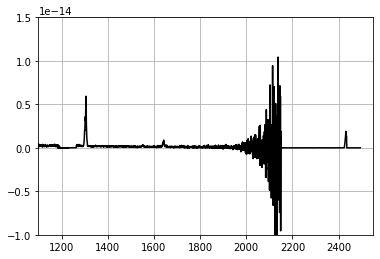

In [83]:
#testing a plot to make sure it works

data = loadtxt('rebinned_april27_1stdataset.txt')
x = data[:,0]
y = data[:,1]


plt.plot(x, y,color='k', label = '1st Dataset for April 27')
plt.xlim(1100,2550)
plt.ylim(-1.0e-14,1.5e-14)
plt.grid()

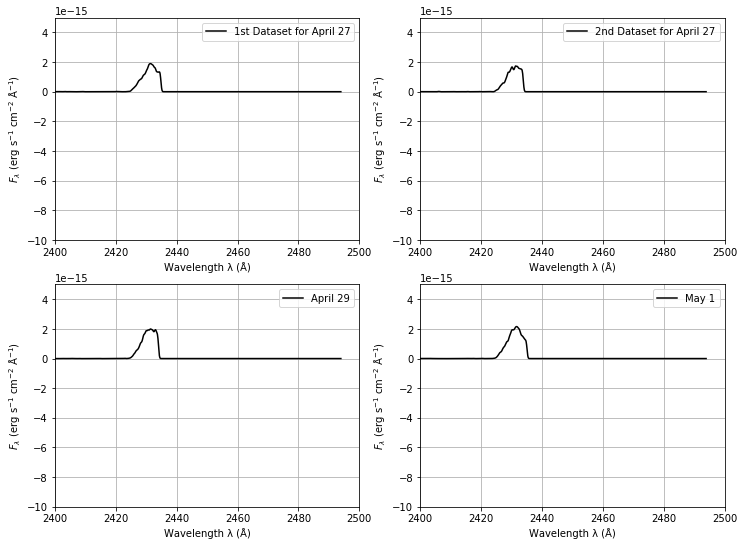

In [171]:
#plotting rebinned data

#first dataset for april 27
plt.figure(figsize=(12,9))

plt.subplot(2,2,1)
plt.plot(x1, smoothed_spectrum1,color='k', label = '1st Dataset for April 27')
plt.xlim(2400,2500)
plt.ylim(-1.0e-14,0.5e-14)
plt.xlabel('Wavelength \u03BB (\u212B)')
plt.ylabel('$F_\u03BB$ (erg s$^{-1}$ cm$^{-2}$ \u212B$^{-1}$)')
plt.legend(loc = 'upper right')
plt.grid()

#second dataset for april 27
plt.subplot(2,2,2)
plt.plot(x2, smoothed_spectrum2,color='k', label = '2nd Dataset for April 27')
plt.xlim(2400,2500)
plt.ylim(-1.0e-14,0.5e-14)
plt.xlabel('Wavelength \u03BB (\u212B)')
plt.ylabel('$F_\u03BB$ (erg s$^{-1}$ cm$^{-2}$ \u212B$^{-1}$)')
plt.legend(loc = 'upper right')
plt.grid()

#april 29
plt.subplot(2,2,3)
plt.plot(x3, smoothed_spectrum3,color='k', label = 'April 29')
plt.xlim(2400,2500)
plt.ylim(-1.0e-14,0.5e-14)
plt.xlabel('Wavelength \u03BB (\u212B)')
plt.ylabel('$F_\u03BB$ (erg s$^{-1}$ cm$^{-2}$ \u212B$^{-1}$)')
plt.legend(loc = 'upper right')
plt.grid()

#may 1
plt.subplot(2,2,4)
plt.plot(x4, smoothed_spectrum4,color='k', label = 'May 1')
plt.xlim(2400,2500)
plt.ylim(-1.0e-14,0.5e-14)
plt.xlabel('Wavelength \u03BB (\u212B)')
plt.ylabel('$F_\u03BB$ (erg s$^{-1}$ cm$^{-2}$ \u212B$^{-1}$)')
plt.grid()
plt.legend(loc = 'upper right')
plt.show()

Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).


INFO: Renormalizing data by factor 1.923231e-18 to improve fitting procedure [pyspeckit.spectrum.fitters]
Param #0   AMPLITUDE0 =  6.16724e-16 +/-        0.110871 
Param #1       SHIFT0 =      1641.88 +/-     1.14383e+15 
Param #2       WIDTH0 =      5.51041 +/-     1.14405e+15   Range:   [0,inf)


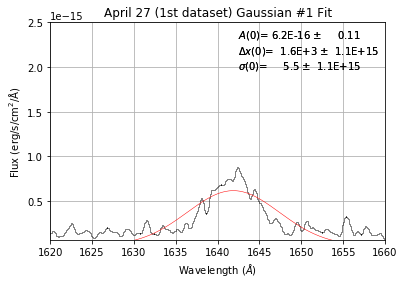

In [166]:
#GAUSSIAN FITTING for April 27 (1st dataset) with rebinned data

# plotting data

data = 'rebinned_april27_1stdataset.txt'
sp = pyspeckit.Spectrum(data)

#limits and axes
sp.plotter(xmin = 1620, xmax = 1660,ymax = 2.5e-15, color = 'k')
plt.title('April 27 (1st dataset) Gaussian #1 Fit')
sp.plotter.axis.set_xlabel(r'Wavelength $(\AA)$')
sp.plotter.axis.set_ylabel(r'Flux ($\mathrm{erg/s/cm^2/\AA})$')
plt.grid()
sp.plotter.refresh()

#Fitting with automatic guesses
#sp.specfit(fittype='gaussian', annotate = True)

#fitting with my own guesses
sp.specfit(fittype= 'gaussian', guesses = [1.0e-15,1642,4], annotate = True)

#sp.specfit.plot_components(xarr=None, show_hyperfine_components=None, component_yoffset=0.08e-15)
print(sp.specfit.parinfo)

Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).


None


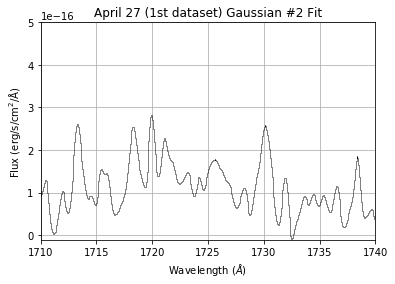

In [167]:
data = 'rebinned_april27_1stdataset.txt'
sp2 = pyspeckit.Spectrum(data)

#limits and axes
sp2.plotter(xmin = 1710, xmax = 1740,ymax = 0.5e-15, color = 'k')
plt.title('April 27 (1st dataset) Gaussian #2 Fit')
sp2.plotter.axis.set_xlabel(r'Wavelength $(\AA)$')
sp2.plotter.axis.set_ylabel(r'Flux ($\mathrm{erg/s/cm^2/\AA})$')
plt.grid()
sp2.plotter.refresh()

#Fitting with automatic guesses
#sp2.specfit(fittype='gaussian', annotate = True)

#fitting with my own guesses
#sp2.specfit(fittype= 'gaussian', guesses = [1.0e-15,1642,4], annotate = True)

#sp.specfit.plot_components(xarr=None, show_hyperfine_components=None, component_yoffset=0.08e-15)
print(sp2.specfit.parinfo)

Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).


INFO: Renormalizing data by factor 1.751909e-18 to improve fitting procedure [pyspeckit.spectrum.fitters]
Param #0   AMPLITUDE0 =  7.95995e-16 +/-        0.135271 
Param #1       SHIFT0 =      1642.47 +/-     7.26319e+14 
Param #2       WIDTH0 =      3.70136 +/-     7.26319e+14   Range:   [0,inf)


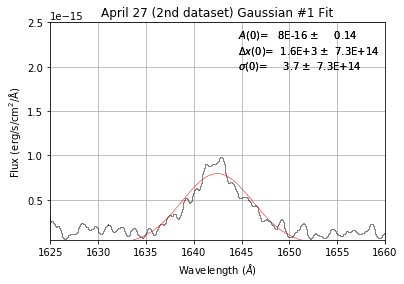

In [169]:
#GAUSSIAN FITTING for April 27 (2nd dataset) with rebinned data

# plotting data

data = 'rebinned_april27_2nddataset.txt'
sp = pyspeckit.Spectrum(data)

#limits and axes
sp.plotter(xmin = 1625, xmax = 1660,ymax = 2.5e-15, color = 'k')
plt.title('April 27 (2nd dataset) Gaussian #1 Fit')
sp.plotter.axis.set_xlabel(r'Wavelength $(\AA)$')
sp.plotter.axis.set_ylabel(r'Flux ($\mathrm{erg/s/cm^2/\AA})$')
plt.grid()
sp.plotter.refresh()

#Fitting with automatic guesses
#sp.specfit(fittype='gaussian', annotate = True)

#fitting with my own guesses
sp.specfit(fittype= 'gaussian', guesses = [1.0e-15,1642,4], annotate = True)

#sp.specfit.plot_components(xarr=None, show_hyperfine_components=None, component_yoffset=0.08e-15)
print(sp.specfit.parinfo)

Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).


INFO: Renormalizing data by factor 1.666698e-18 to improve fitting procedure [pyspeckit.spectrum.fitters]
Param #0   AMPLITUDE0 =  7.03693e-16 +/-        0.147695 
Param #1       SHIFT0 =       1640.4 +/-      7.5248e+14 
Param #2       WIDTH0 =      3.10486 +/-      7.5248e+14   Range:   [0,inf)


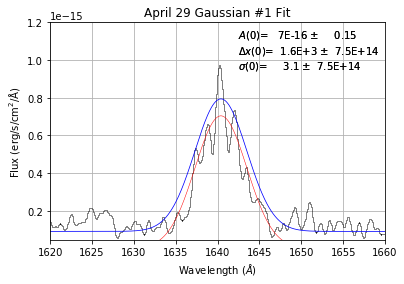

In [162]:
#GAUSSIAN FITTING for April 29 with rebinned data

# plotting data

data2 = 'rebinned_april29.txt'
sp2 = pyspeckit.Spectrum(data2)

#limits and axes
sp2.plotter(xmin = 1620, xmax = 1660,ymax = 1.2e-15, color = 'k')
plt.title('April 29 Gaussian #1 Fit')
sp2.plotter.axis.set_xlabel(r'Wavelength $(\AA)$')
sp2.plotter.axis.set_ylabel(r'Flux ($\mathrm{erg/s/cm^2/\AA})$')
plt.grid()
sp2.plotter.refresh()

#Fitting with automatic guesses
#sp.specfit(fittype='gaussian', annotate = True)

#fitting with my own guesses
sp2.specfit(fittype= 'gaussian', guesses = [2.0e-15,1640,10], annotate = True)

sp2.specfit.plot_components(xarr=None, show_hyperfine_components=None, component_yoffset=0.09e-15)
print(sp2.specfit.parinfo)

Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).


None


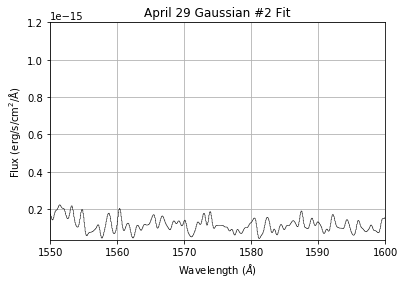

In [114]:
#GAUSSIAN FITTING for April 29 with rebinned data

# plotting data

data2 = 'rebinned_april29.txt'
sp3 = pyspeckit.Spectrum(data2)

#limits and axes
sp3.plotter(xmin = 1550, xmax = 1600,ymax = 1.2e-15, color = 'k')
plt.title('April 29 Gaussian #2 Fit')
sp3.plotter.axis.set_xlabel(r'Wavelength $(\AA)$')
sp3.plotter.axis.set_ylabel(r'Flux ($\mathrm{erg/s/cm^2/\AA})$')
plt.grid()
sp3.plotter.refresh()

#Fitting with automatic guesses
#sp.specfit(fittype='gaussian', annotate = True)

#fitting with my own guesses
#sp3.specfit(fittype= 'gaussian', guesses = [2.0e-15,1640,10], annotate = True)

#sp3.specfit.plot_components(xarr=None, show_hyperfine_components=None, component_yoffset=0.09e-15)
#print(sp3.specfit.parinfo)

Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).


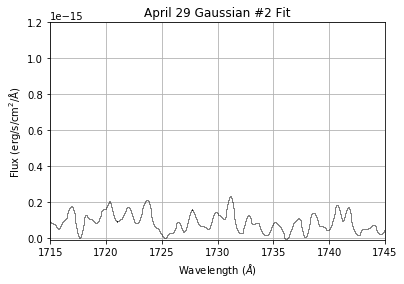

In [126]:
#GAUSSIAN FITTING for April 29 with rebinned data

# plotting data

data2 = 'rebinned_april29.txt'
sp4 = pyspeckit.Spectrum(data2)

#limits and axes
sp4.plotter(xmin = 1715, xmax = 1745,ymax = 1.2e-15, color = 'k')
plt.title('April 29 Gaussian #2 Fit')
sp4.plotter.axis.set_xlabel(r'Wavelength $(\AA)$')
sp4.plotter.axis.set_ylabel(r'Flux ($\mathrm{erg/s/cm^2/\AA})$')
plt.grid()
sp4.plotter.refresh()

#Fitting with automatic guesses
#sp.specfit(fittype='gaussian', annotate = True)

#fitting with my own guesses
#sp3.specfit(fittype= 'gaussian', guesses = [2.0e-15,1640,10], annotate = True)

#sp3.specfit.plot_components(xarr=None, show_hyperfine_components=None, component_yoffset=0.09e-15)
#print(sp3.specfit.parinfo)